In [1]:
# Necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')

import ipywidgets as widgets

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

# Use pandas_reader.data.DataReader to load the desired data.
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
from pandas_datareader import data
from pandas_datareader import data as pdr

# pip install yfinance
import yfinance as yf
# pandas_datareader override from "https://pypi.org/project/yfinance/"
yf.pdr_override()

# Shutil, Glob, and OS: Accessing folders/files on the computer.
# Smtplib and SSL: Sending a report over email.
import shutil, os, time, glob, smtplib, ssl

# Get_All_Tickers: Filter through all stocks to get the list you desire.
# pip install get-all-tickers
from get_all_tickers import get_tickers as gt

In [2]:
# tickers = ["FB", "AMZN", "MSFT", "TSLA" ... ] or
tickers = gt.get_tickers_filtered(mktcap_min=150000, mktcap_max=10000000)

# Check that the amount of tickers isn't more than 1800
print('The amount of stocks chosen to observe: ' + str(len(tickers)))

The amount of stocks chosen to observe: 54


In [3]:
# Download dataframe
stocks_data = pdr.get_data_yahoo("INTC AAPL MSFT TSLA GOOG", start='2020-01-01', end='2020-11-17')

# or in the above line
start_date = '2020-01-02'
end_date = '2020-11-17'
tickers = ["FB", "AMZN", "MSFT", "TSLA", "BRKB"] # or by mktcap like above

[*********************100%***********************]  5 of 5 completed


#### Python for Finance, I,II,III
[LINK](https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/)

In [4]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = stocks_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
# Weekdays is achieved by passing the freq=’B’ named parameter to the pd.date_range() function
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [5]:
print(all_weekdays)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-16', '2020-11-17'],
              dtype='datetime64[ns]', length=229, freq='B')


In [6]:
close.head(10)

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,75.087502,1367.369995,60.840000,160.619995,86.052002
2020-01-03,74.357498,1360.660034,60.099998,158.619995,88.601997
2020-01-06,74.949997,1394.209961,59.930000,159.029999,90.307999
2020-01-07,74.597504,1393.339966,58.930000,157.580002,93.811996
2020-01-08,75.797501,1404.319946,58.970001,160.089996,98.428001
2020-01-09,77.407501,1419.829956,59.299999,162.089996,96.267998
2020-01-10,77.582497,1429.729980,58.939999,161.339996,95.629997
2020-01-13,79.239998,1439.229980,59.590000,163.279999,104.972000
2020-01-14,78.169998,1430.880005,59.430000,162.130005,107.584000
2020-01-15,77.834999,1439.199951,58.939999,163.179993,103.699997


In [7]:
close.tail(10)

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-04,114.949997,1749.130005,45.700001,216.389999,420.980011
2020-11-05,119.029999,1763.369995,45.680000,223.289993,438.089996
2020-11-06,118.690002,1761.750000,45.389999,223.720001,429.950012
2020-11-09,116.320000,1763.000000,45.599998,218.389999,421.260010
2020-11-10,115.970001,1740.390015,45.439999,211.009995,410.359985
2020-11-11,119.489998,1752.709961,46.349998,216.550003,417.130005
2020-11-12,119.209999,1749.839966,44.950001,215.440002,411.760010
2020-11-13,119.260002,1777.020020,45.459999,216.509995,408.500000
2020-11-16,120.300003,1781.380005,46.189999,217.229996,408.089996
2020-11-17,120.300003,1781.380005,46.189999,217.229996,408.089996


In [8]:
close.describe()

,AAPL,GOOG,INTC,MSFT,TSLA
count,229.000000,229.000000,229.000000,229.000000,229.000000
mean,91.302434,1442.851634,55.837904,189.798122,245.422497
std,20.053310,148.831661,6.320714,22.558711,126.613055
min,56.092499,1056.619995,44.110001,135.419998,72.244003
25%,75.797501,1383.939941,49.939999,170.889999,145.966003
50%,84.699997,1458.630005,57.990002,188.699997,189.983994
75%,112.820000,1520.579956,60.090000,209.190002,388.040009
max,134.179993,1781.380005,68.470001,231.649994,498.320007


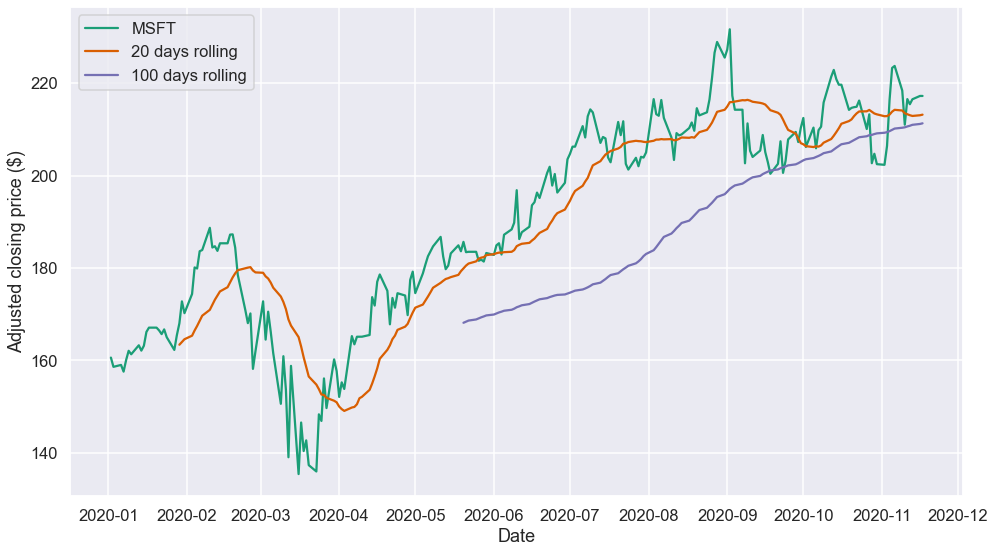

In [9]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [10]:
# Calculating the short-window moving average
# Note that when calculating the M days moving average, the first M−1 are not valid, as M prices are required for the first moving average data point.
short_rolling = close.rolling(window=20).mean()
short_rolling.head()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calculating the short-window moving average
long_rolling = close.rolling(window=100).mean()
long_rolling.tail()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-11,110.413825,1541.554395,51.5693,210.6297,368.970919
2020-11-12,110.693825,1544.639495,51.4337,210.7807,371.116559
2020-11-13,111.002350,1548.810695,51.3133,210.9825,373.282079
2020-11-16,111.300900,1552.674795,51.1925,211.1704,375.344279
2020-11-17,111.591900,1556.352495,51.0561,211.3076,377.265559


In [12]:
# Relative returns using Pandas
returns = close.pct_change(1)
returns.head()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.004907,-0.012163,-0.012452,0.029633
2020-01-06,0.007968,0.024657,-0.002829,0.002585,0.019255
2020-01-07,-0.004703,-0.000624,-0.016686,-0.009118,0.038801
2020-01-08,0.016086,0.007880,0.000679,0.015928,0.049205


In [13]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(close).diff()
log_returns.head()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.004919,-0.012238,-0.012530,0.029203
2020-01-06,0.007937,0.024358,-0.002833,0.002581,0.019072
2020-01-07,-0.004714,-0.000624,-0.016827,-0.009160,0.038067
2020-01-08,0.015958,0.007849,0.000679,0.015803,0.048033


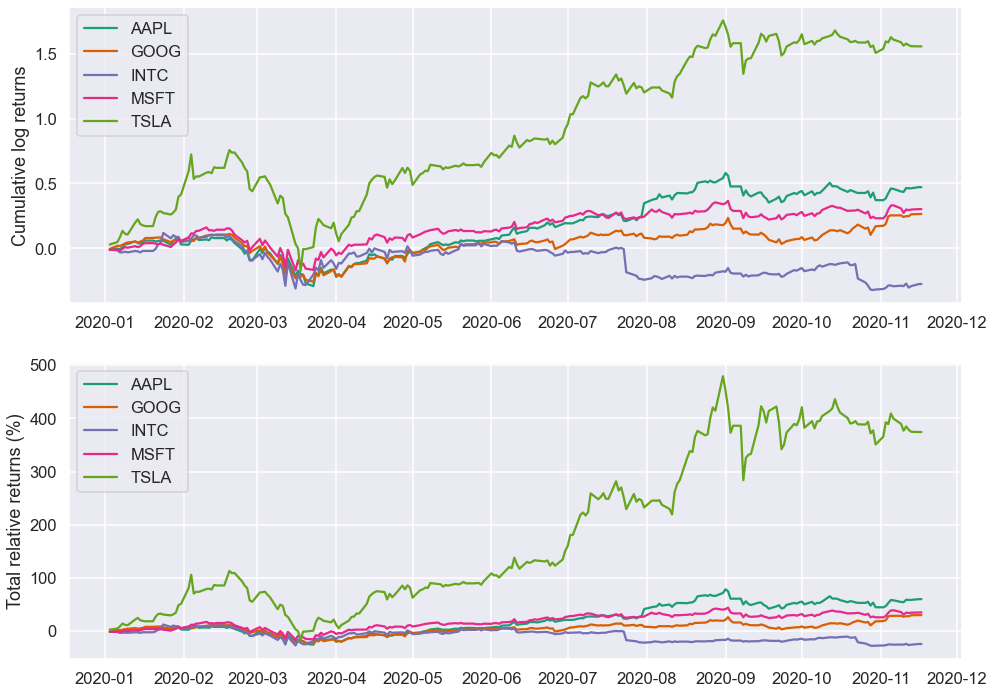

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [15]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(2).transpose()
r_t

,2020-11-16,2020-11-17
AAPL,0.008683,0.0
GOOG,0.002451,0.0
INTC,0.015930,0.0
MSFT,0.003320,0.0
TSLA,-0.001004,0.0


In [16]:
# Weights in portfolio
weights_vector = pd.DataFrame(1 / 3, index=r_t.index, columns=r_t.columns)
weights_vector

,2020-11-16,2020-11-17
AAPL,0.333333,0.333333
GOOG,0.333333,0.333333
INTC,0.333333,0.333333
MSFT,0.333333,0.333333
TSLA,0.333333,0.333333


In [17]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2020-11-16,2020-11-17
2020-11-16,0.009793,0.0
2020-11-17,0.009793,0.0


Assume that R∈ℝT×K
 is a matrix, the t
th row of which is the row vector r⃗ (t)T
. Similarly, W∈ℝT×K
 is a matrix, the t
th row of which is the row vector w⃗ (t)T
. Then if r⃗ p=[rp(1),…,rp(T)]T∈RT×1
 is a column vector of all portfolio returns, we have

r⃗ p=diag{WRT}

where diag{A}
 is the diagonal of a matrix A
. The diagonal extraction is required because only in the diagonal the weights and log-returns vectors are properly time-aligned.

In [18]:
# In this case matrix W will be:
weights_matrix = pd.DataFrame(1 / 3, index=close.index, columns=close.columns)
weights_matrix.tail()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-11,0.333333,0.333333,0.333333,0.333333,0.333333
2020-11-12,0.333333,0.333333,0.333333,0.333333,0.333333
2020-11-13,0.333333,0.333333,0.333333,0.333333,0.333333
2020-11-16,0.333333,0.333333,0.333333,0.333333,0.333333
2020-11-17,0.333333,0.333333,0.333333,0.333333,0.333333


In [19]:
# Matrix R is the log-returns dataframe defined before.
log_returns.head()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.004919,-0.012238,-0.012530,0.029203
2020-01-06,0.007937,0.024358,-0.002833,0.002581,0.019072
2020-01-07,-0.004714,-0.000624,-0.016827,-0.009160,0.038067
2020-01-08,0.015958,0.007849,0.000679,0.015803,0.048033


In [20]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08
2020-01-02,NaN,-0.003418,0.017038,0.002247,0.029441
2020-01-03,NaN,-0.003418,0.017038,0.002247,0.029441
2020-01-06,NaN,-0.003418,0.017038,0.002247,0.029441
2020-01-07,NaN,-0.003418,0.017038,0.002247,0.029441
2020-01-08,NaN,-0.003418,0.017038,0.002247,0.029441


In [21]:
# The numpy np.diag function is used to extract the diagonal and then 
# a Series is constructed using the time information from the log_returns index

# Returns are only estimates because log-returns are used instead of relative returns.
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2020-11-11    0.033021
2020-11-12   -0.017584
2020-11-13    0.008040
2020-11-16    0.009793
2020-11-17    0.000000
Freq: B, dtype: float64

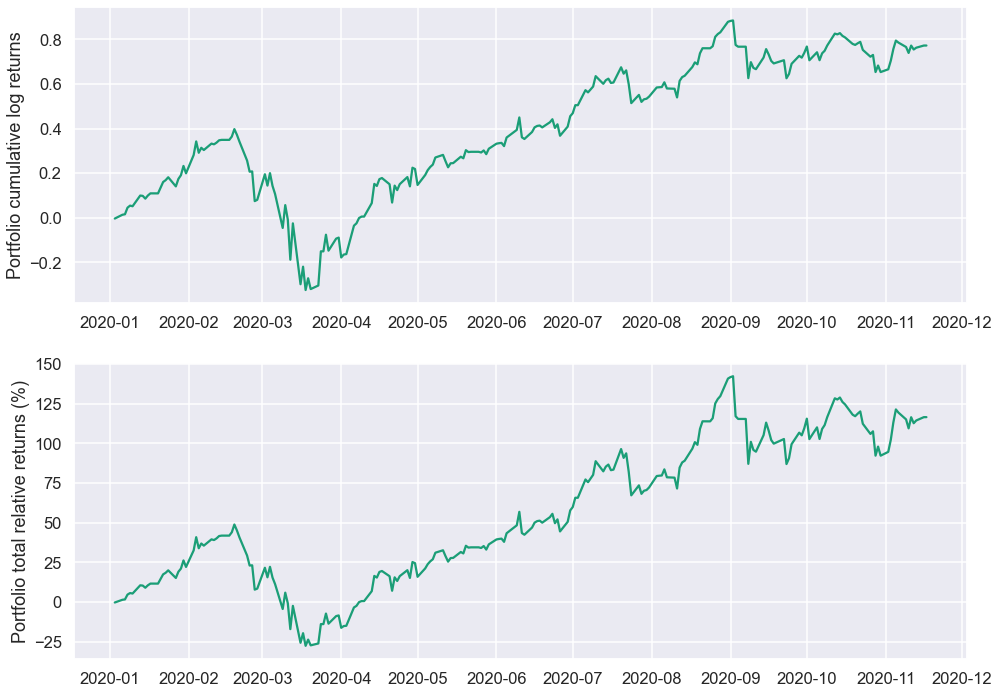

In [22]:
# Cumulative log returns and the total relative returns of the portfolio
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [23]:
# Calculating the time-related parameters of the simulation

# We are solving (1 + average_yearly_return)^number_of_years = 1 + total_portfolio_return
# we raise to power (1 / number of years) to cancel out in left
# (1 + total_portfolio_return)**(1 / number_of_years) = 1 + average_yearly_return
# and we get average_yearly_return

# (number_of_years)th rooth of (1 + total_portfolio_return) = 1 + average_yearly_return
# (1 + total_portfolio_return)**(1 / number_of_years)

# weekdays each year
days_per_year = 52 * 5

total_days_in_simulation = close.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / float(number_of_years)) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 116.61%
Average yearly return is: 140.50%


In [24]:
close.head()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,75.087502,1367.369995,60.840000,160.619995,86.052002
2020-01-03,74.357498,1360.660034,60.099998,158.619995,88.601997
2020-01-06,74.949997,1394.209961,59.930000,159.029999,90.307999
2020-01-07,74.597504,1393.339966,58.930000,157.580002,93.811996
2020-01-08,75.797501,1404.319946,58.970001,160.089996,98.428001


In [25]:
close.tail()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-11,119.489998,1752.709961,46.349998,216.550003,417.130005
2020-11-12,119.209999,1749.839966,44.950001,215.440002,411.760010
2020-11-13,119.260002,1777.020020,45.459999,216.509995,408.500000
2020-11-16,120.300003,1781.380005,46.189999,217.229996,408.089996
2020-11-17,120.300003,1781.380005,46.189999,217.229996,408.089996


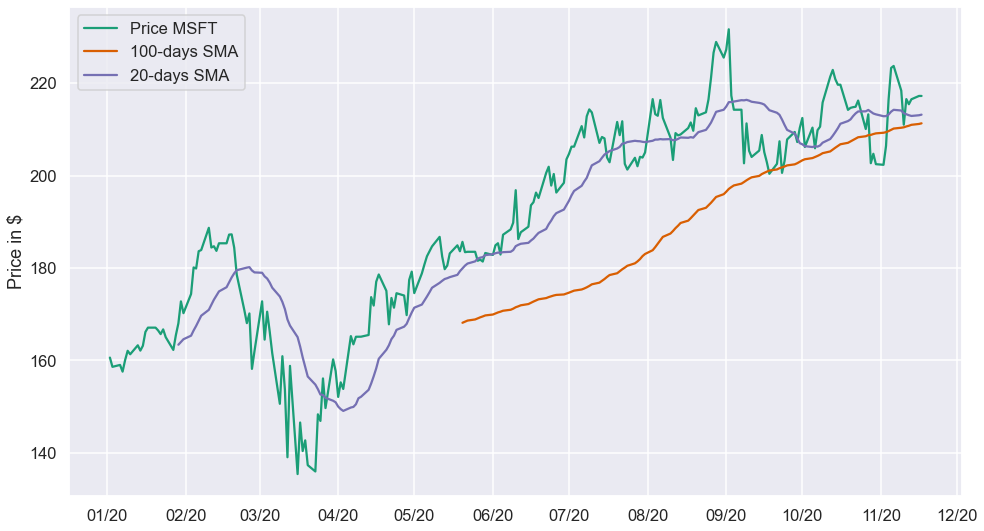

In [26]:
start_date = '2020-01-02'
end_date = '2020-11-17'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.loc[start_date:end_date, :].index, close.loc[start_date:end_date, 'MSFT'], label='Price MSFT')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'MSFT'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

For a SMA moving average calculated using M days, the lag (L) is roughly M/2 days. When using a 100 days SMA, the latency is almost 50 days, which can significantly affect the strategy.

One way to reduce the lag induced by the use of the SMA is to use the so-called Exponential Moving Average (EMA), defined as

EMA(t)=(1−α)EMA(t−1)+αp(t)
EMA(t0)=p(t0)

where p(t) is the price at time tand α is called the decay parameter for the EMA. α is related to the lag as α=1/(L+1)
and the length of the window (span) M as α=2/(M+1)

The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by 1/M.

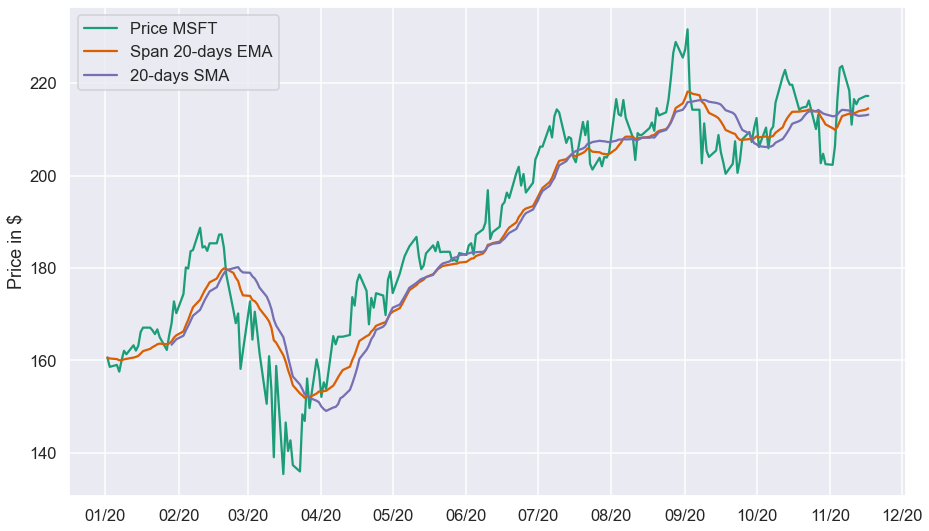

In [27]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = close.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(close.loc[start_date:end_date, :].index, close.loc[start_date:end_date, 'MSFT'], label='Price MSFT')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [28]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = close - ema_short
trading_positions_raw.tail()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-11,3.751991,96.519013,-0.922218,3.059246,-3.146512
2020-11-12,3.141327,84.730064,-2.101052,1.763603,-7.705411
2020-11-13,2.887394,101.252011,-1.439525,2.563729,-9.921095
2020-11-16,3.553357,95.553711,-0.641952,2.970994,-9.347184
2020-11-17,3.214942,86.453357,-0.580813,2.688042,-8.456976


In [29]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-11,0.333333,0.333333,-0.333333,0.333333,-0.333333
2020-11-12,0.333333,0.333333,-0.333333,0.333333,-0.333333
2020-11-13,0.333333,0.333333,-0.333333,0.333333,-0.333333
2020-11-16,0.333333,0.333333,-0.333333,0.333333,-0.333333
2020-11-17,0.333333,0.333333,-0.333333,0.333333,-0.333333


In [30]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

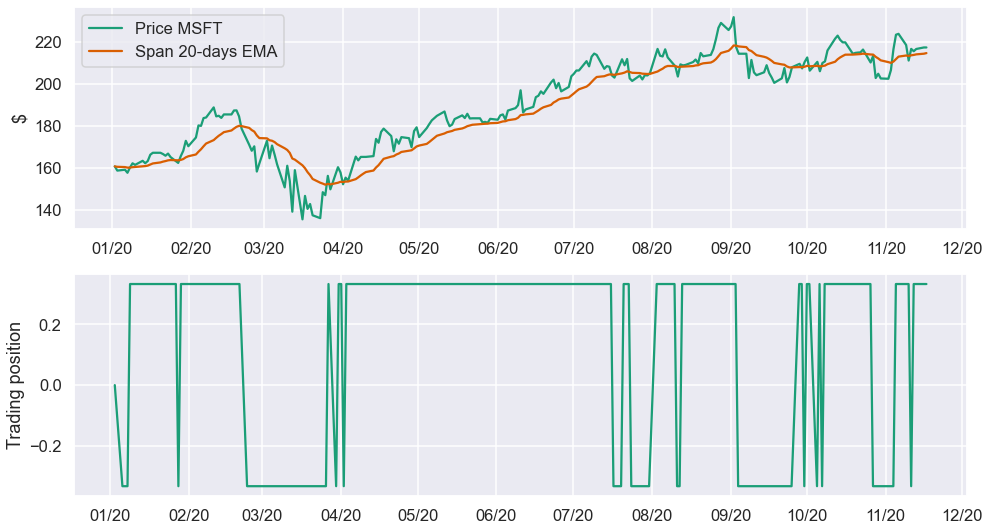

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(close.loc[start_date:end_date, :].index, close.loc[start_date:end_date, 'MSFT'], label='Price MSFT')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'MSFT'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [32]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(close).diff()
asset_log_returns.head()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.004919,-0.012238,-0.012530,0.029203
2020-01-06,0.007937,0.024358,-0.002833,0.002581,0.019072
2020-01-07,-0.004714,-0.000624,-0.016827,-0.009160,0.038067
2020-01-08,0.015958,0.007849,0.000679,0.015803,0.048033


In [33]:
# To get all the strategy log-returns for all days, one needs simply to multiply the strategy positions with the asset log-returns.
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,AAPL,GOOG,INTC,MSFT,TSLA
2020-11-11,0.009967,0.002351,-0.006610,-0.008639,-0.005454
2020-11-12,-0.000782,-0.000546,0.010223,-0.001713,0.004319
2020-11-13,0.000140,0.005138,-0.003761,0.001651,0.002650
2020-11-16,0.002894,0.000817,-0.005310,0.001107,0.000335
2020-11-17,0.000000,0.000000,-0.000000,0.000000,-0.000000


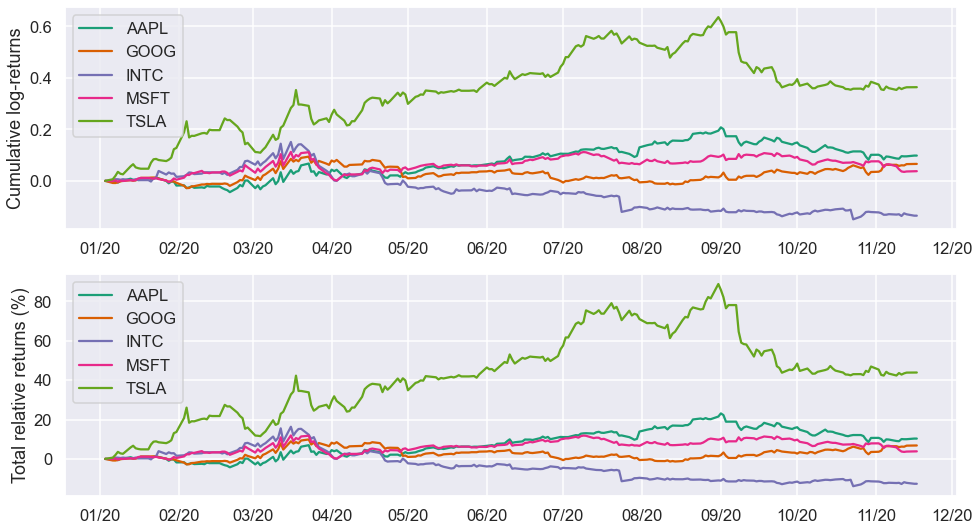

In [34]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

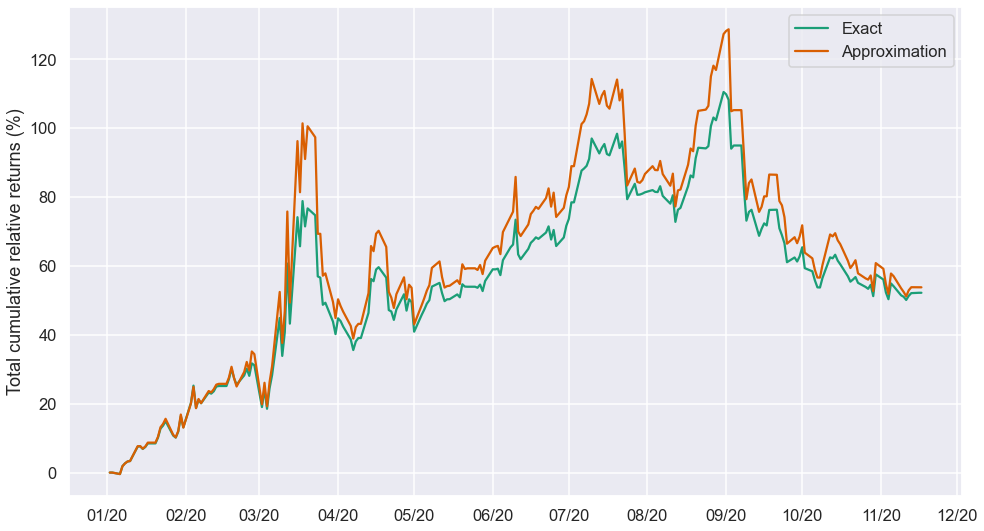

In [35]:
# An alternative way for small values of the relative returns is to add all the strategy log-returns first and then convert these to relative returns.
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

Remember the following:

1. Log-returns can and should be added across time for a single asset to calculate cumulative return timeseries across time.
2. However, when summing (or averaging) log-returns across assets, care should be taken. Relative returns can be added, but log-returns only if we can safely assume they are a good-enough approximation of the relative returns.

In [36]:
# Overall, yearly, performance of our strategy
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/float(number_of_years)) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 52.23%
Average yearly return is: 61.14%


Total portfolio return is: 96.05%
Average yearly return is: 114.76%


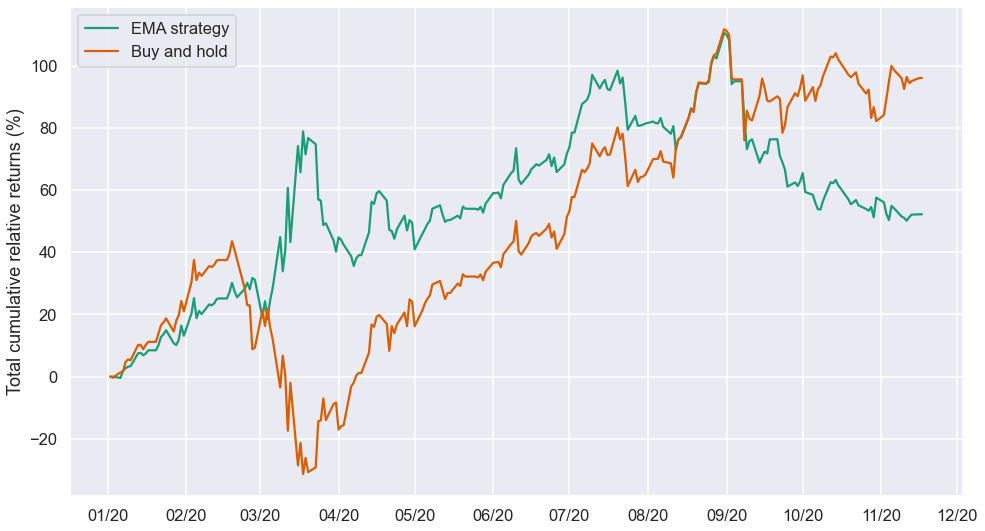

In [37]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/3, index = close.index, columns=close.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)

#### Automating your stock analysis with Python
[LINK](https://handsoffinvesting.com/automating-your-stock-analysis-with-python/)

In [38]:
tickers = gt.get_tickers_filtered(mktcap_min=500000, mktcap_max=10000000)
# Check that the amount of tickers isn't more than 1800
print("The amount of stocks chosen to observe: " + str(len(tickers)))

The amount of stocks chosen to observe: 8


In [39]:
# Location  
location = "/Users/robert.radoslav/"
 
# Directory  
dir = "stocks_export/"

# Path  
path = os.path.join(location, dir)

# These two lines remove the Stocks folder and then recreate it in order to remove old stocks.
shutil.rmtree(path)
os.mkdir(path)

# Holds the amount of API calls we executed
Amount_of_API_Calls = 0
# This while loop is reponsible for storing the historical data for each ticker in our list. Note that yahoo finance sometimes incurs json.decode errors and because of this we are sleeping for 2 seconds after each iteration, also if a call fails we are going to try to execute it again. Also, do not make more than 2,000 calls per hour or 48,000 calls per day or Yahoo Finance may block your IP. The clause "(Amount_of_API_Calls < 1800)" below will stop the loop from making too many calls to the yfinance API.Prepare for this loop to take some time. It is pausing for 2 seconds after importing each stock.
Stock_Failure = 0  # Used to make sure we don't waste too many API calls on one Stock ticker that could be having issues
Stocks_Not_Imported = 0
# Used to iterate through our list of tickers
i=0
while (i < len(tickers)) and (Amount_of_API_Calls < 1800):
    try:
        stock = tickers[i]  # Gets the current stock ticker
        temp = yf.Ticker(str(stock))
        Hist_data = temp.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)
        Hist_data.to_csv(path+stock+".csv")  # Saves the historical data in csv format for further processing later
        time.sleep(2)  # Pauses the loop for two seconds so we don't cause issues with Yahoo Finance's backend operations
        Amount_of_API_Calls += 1 
        Stock_Failure = 0
        i += 1  # Iteration to the next ticker
    except ValueError:
        print("Yahoo Finance Backend Error, Attempting to Fix")  # An error occured on Yahoo Finance's backend. We will attempt to retreive the data again
        if Stock_Failure > 5:  # Move on to the next ticker if the current ticker fails more than 5 times
            i+=1
            Stocks_Not_Imported += 1
        Amount_of_API_Calls += 1
        Stock_Failure += 1
print("The amount of stocks we successfully imported: " + str(i - Stocks_Not_Imported))

The amount of stocks we successfully imported: 8


In [40]:
# OBV Analysis
list_files = (glob.glob(path+"*.csv")) # Creates a list of all csv filenames in the stocks folder
new_data = [] #  This will be a 2D array to hold our stock name and OBV score
interval = 0  # Used for iteration
while interval < len(list_files):
    Data = pd.read_csv(list_files[interval]).tail(10)  # Gets the last 10 days of trading for the current stock in iteration
    pos_move = []  # List of days that the stock price increased
    neg_move = []  # List of days that the stock price increased
    OBV_Value = 0  # Sets the initial OBV_Value to zero
    count = 0
    while (count < 10):  # 10 because we are looking at the last 10 trading days
        if Data.iloc[count,1] < Data.iloc[count,4]:  # True if the stock increased in price
            pos_move.append(count)  # Add the day to the pos_move list
        elif Data.iloc[count,1] > Data.iloc[count,4]:  # True if the stock decreased in price
            neg_move.append(count)  # Add the day to the neg_move list
        count += 1
    count2 = 0
    for i in pos_move:  # Adds the volumes of positive days to OBV_Value, divide by opening price to normalize across all stocks
        OBV_Value = round(OBV_Value + (Data.iloc[i,5]/Data.iloc[i,1]))
    for i in neg_move:  # Subtracts the volumes of negative days from OBV_Value, divide by opening price to normalize across all stocks
        OBV_Value = round(OBV_Value - (Data.iloc[i,5]/Data.iloc[i,1]))
    Stock_Name = ((os.path.basename(list_files[interval])).split(".csv")[0])  # Get the name of the current stock we are analyzing
    new_data.append([Stock_Name, OBV_Value])  # Add the stock name and OBV value to the new_data list
    interval += 1
df = pd.DataFrame(new_data, columns = ['Stock', 'OBV_Value'])  # Creates a new dataframe from the new_data list
df["Stocks_Ranked"] = df["OBV_Value"].rank(ascending = False)  # Rank the stocks by their OBV_Values
df.sort_values("OBV_Value", inplace = True, ascending = False)  # Sort the ranked stocks
df.to_csv(path+"OBV_Ranked.csv", index = False)  # Save the dataframe to a csv without the index column

Analysis = pd.read_csv(path+"OBV_Ranked.csv")  # Read in the ranked stocks
top10 = Analysis.head(10)  # I want to see the 10 stocks in my analysis with the highest OBV values
bottom10 = Analysis.tail(10)

port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = "radoslavrobert@gmail.com"  # Enter your address
receiver_email = "robert.radoslav@pm.me"  # Enter receiver address
password = input("Type your password and press enter: ")
message = """\
Subject: Daily Stock Report
Your highest ranked OBV stocks of the day:
""" + top10.to_string(index=False) + """\
Your lowest ranked OBV stocks of the day:
""" + bottom10.to_string(index=False) + """\
Sincerely,
Your Computer"""

context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, message)
    
Check [Sending Emails With Python](https://realpython.com/python-send-email/)